In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

path='DataSG056'
file_path=[]
for filename in os.listdir(path):
    file_path.append((os.path.join(path,filename)))


### read data
* first 6 columns are dates `2021 04 01 00 00 00`
* 7th column -> G1-F60 in volt 
* 8th column -> G2-F60 in volt
* 9th column -> Br1-F60
* 10th column -> Br2-F60

In [2]:
data=np.array([])
for address in file_path:
    if data.size==0:
        data=np.loadtxt(address,skiprows=43,unpack=True)
    else:
        nd=np.loadtxt(address,skiprows=43,unpack=True)
        data=np.column_stack((data,nd))
print(data[6,:])

[-4.1528314 -4.1489701 -4.1452361 ... -4.9362371 -4.935311  -4.9343579]


### convert measurement
volt -> $\mu$gal

In [3]:
cal1=-40.11
cal2=-80.0699
data[6,:]=cal1*data[6,:]
data[7,:]=cal2*data[7,:]

### plot measurement data

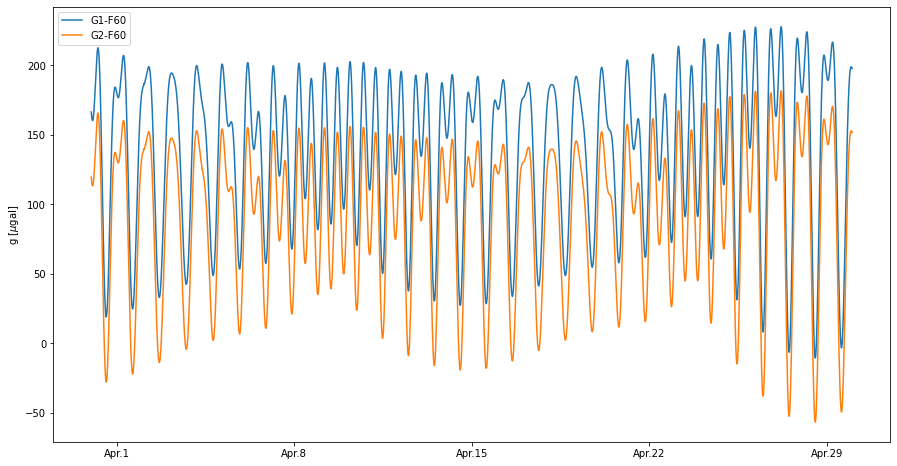

In [28]:
time=(data[2,:]-1)*24*60+data[3,:]*60+data[4,:]
fig = plt.figure(figsize=(15,8)); ax = fig.add_subplot(1, 1, 1)
ax.plot(time,data[6,:],label='G1-F60')
ax.plot(time,data[7,:],label='G2-F60')
ax.legend(loc='best')
plt.ylabel('g [$\mu$gal]')
ticks = ax.set_xticks(np.linspace(1,29,5)*24*60)
labels = ax.set_xticklabels(['Apr.1','Apr.8','Apr.15','Apr.22','Apr.29'])

### Fourriertransformation

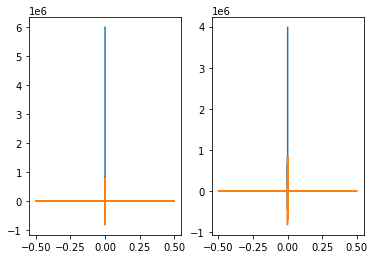

In [5]:
g1_f=np.fft.fft(data[6,:])
g2_f=np.fft.fft(data[7,:])
fig = plt.figure(); ax = fig.add_subplot(1,2, 1)
sp1 = np.fft.fft(data[6,:])
sp2 = np.fft.fft(data[7,:])
freq = np.fft.fftfreq(time.shape[-1])
ax.plot(freq, sp1.real, freq, sp1.imag)
ax=fig.add_subplot(1, 2, 2)
ax.plot(freq, sp2.real, freq, sp2.imag)
plt.show()

### read in tides data

In [18]:
dt=pd.read_csv('TidesBFOApril2021.csv')
dt

,UTC,Signal [nm/s**2],Tide [nm/s**2],Pole tide [nm/s**2],LOD tide [nm/s**2]
0,4/1/2021 0:00,546.125571,541.976237,3.997171,0.152164
1,4/1/2021 0:01,544.573334,540.423972,3.997260,0.152102
2,4/1/2021 0:02,543.036313,538.886923,3.997349,0.152041
3,4/1/2021 0:03,541.514701,537.365284,3.997438,0.151979
4,4/1/2021 0:04,540.008690,535.859246,3.997527,0.151918
...,...,...,...,...,...
43195,4/30/2021 23:55,821.003721,813.020851,8.064426,-0.081557
43196,4/30/2021 23:56,820.631787,812.648816,8.064600,-0.081629
43197,4/30/2021 23:57,820.256730,812.273657,8.064774,-0.081702
43198,4/30/2021 23:58,819.878705,811.895530,8.064948,-0.081774


### correction with tides data
The measurement data from gravimeter includes the signals from tides, which will be eliminated in following section.

Text(0, 0.5, 'P [mbar]')

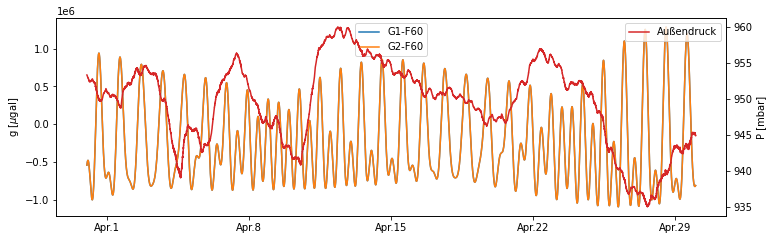

In [25]:
g1_k=data[6,:]-dt['Tide [nm/s**2]']*1000
g2_k=data[7,:]-dt['Tide [nm/s**2]']*1000
fig = plt.figure(figsize=(12,8)); ax = fig.add_subplot(2, 1, 1)
ax.plot(time,g1_k,label='G1-F60')
ax.plot(time,g2_k,label='G2-F60')
ax.legend(loc='best')
plt.ylabel('g [$\mu$gal]')
ticks = ax.set_xticks(np.linspace(1,29,5)*24*60)
labels = ax.set_xticklabels(['Apr.1','Apr.8','Apr.15','Apr.22','Apr.29'])
ax2 = ax.twinx()
color = 'tab:red'
ax2.plot(time,data[9,:],label='Außendruck',color=color)
ax2.legend(loc='best')
ax2.set_ylabel('P [mbar]')